### Aim:
Our aim here is to analyze the sales data data for past 18 months from 365 stores of WOMart which is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc and then making prediction on the store sales for each store in the test set for the next two months.

I am using Jupter notebook because it provides a quick and convenient way to write your code in a cell which we can then execute and check for error in real time. 

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing sklearn libraries 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.pipeline import Pipeline, make_pipeline  # for building pipeline

# libraries for feature selection
from sklearn.feature_selection import SelectFromModel 
from mlxtend.feature_selection import SequentialFeatureSelector

# libraries for some statistics
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm, skew 

In [2]:
# Importing datasets
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST_FINAL.csv')

In [3]:
train.head(20)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
5,T1000006,249,S1,L3,R2,2018-01-01,1,Yes,39,34211.22
6,T1000007,248,S1,L1,R2,2018-01-01,1,Yes,40,35352.66
7,T1000008,247,S1,L1,R3,2018-01-01,1,Yes,64,52650.00
8,T1000009,246,S3,L1,R3,2018-01-01,1,Yes,62,42633.78
9,T1000010,254,S4,L1,R1,2018-01-01,1,Yes,87,62572.80


In [4]:
test.head(10)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No
5,T1188346,175,S4,L2,R1,2019-06-01,0,No
6,T1188347,176,S4,L2,R3,2019-06-01,0,No
7,T1188348,169,S1,L2,R4,2019-06-01,0,No
8,T1188349,14,S3,L2,R4,2019-06-01,0,No
9,T1188350,177,S2,L1,R4,2019-06-01,0,No


In [5]:
train.shape, test.shape

((188340, 10), (22265, 8))

### Checking for missing values

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [8]:
#value_count('Store_Type')
#value_count('Location_Type')
#value_count('Region_Code')
#value_count('Holiday')
#value_count('Discount')

In [9]:
# Changing attribute dtype for analysis purpose
train['Holiday'] = train['Holiday'].astype('object')   
test['Holiday'] = test['Holiday'].astype('object') 

In [10]:
train.describe()

,Store_id,#Order,Sales
count,188340.000000,188340.000000,188340.000000
mean,183.000000,68.205692,42784.327982
std,105.366308,30.467415,18456.708302
min,1.000000,0.000000,0.000000
25%,92.000000,48.000000,30426.000000
50%,183.000000,63.000000,39678.000000
75%,274.000000,82.000000,51909.000000
max,365.000000,371.000000,247215.000000


In [11]:
test.describe()

,Store_id
count,22265.000000
mean,183.000000
std,105.368395
min,1.000000
25%,92.000000
50%,183.000000
75%,274.000000
max,365.000000


### Both of our dataset has no missing values, which is good, so now let's move on to next step 

### Feature Engineering

In [12]:
# Converting date to datetime column to extract features in train dataset
train['Date'] = pd.to_datetime(train['Date'])       

In [13]:
# Extracting day, month, year, week_of_year and day_of_week from the date column
train['Day'] = train['Date'].dt.day
train['Month'] = train['Date'].dt.month
train['Year'] = train['Date'].dt.year
train['Week_of_Year'] = train['Date'].dt.week
train['day_of_week'] = train['Date'].dt.dayofweek

In [14]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Day,Month,Year,Week_of_Year,day_of_week
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,1,2018,1,0
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1,1,2018,1,0
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1,1,2018,1,0
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1,1,2018,1,0
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1,1,2018,1,0


In [15]:
# Setting 'date' as index column in TRAIN dataset in order to navigate across the dataset using data as index
train = train.set_index('Date')

In [16]:
# Converting date to datetime column to extract features in test dataset
test['Date'] = pd.to_datetime(test['Date'])        

# Extracting day, month, year, week_of_year, day_of_week from the date column
test['Day'] = test['Date'].dt.day
test['Month'] = test['Date'].dt.month
test['Year'] = test['Date'].dt.year
test['Week_of_Year'] = test['Date'].dt.week
test['day_of_week'] = test['Date'].dt.dayofweek

In [17]:
# Setting 'date' as index column in TEST_FINAL dataset
test = test.set_index('Date')

In [18]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,Day,Month,Year,Week_of_Year,day_of_week
Date,,,,,,,,,,,,,,
2018-01-01,T1000001,1,S1,L3,R1,1,Yes,9,7011.84,1,1,2018,1,0
2018-01-01,T1000002,253,S4,L2,R1,1,Yes,60,51789.12,1,1,2018,1,0
2018-01-01,T1000003,252,S3,L2,R1,1,Yes,42,36868.20,1,1,2018,1,0
2018-01-01,T1000004,251,S2,L3,R1,1,Yes,23,19715.16,1,1,2018,1,0
2018-01-01,T1000005,250,S2,L3,R4,1,Yes,62,45614.52,1,1,2018,1,0


In [19]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Day,Month,Year,Week_of_Year,day_of_week
Date,,,,,,,,,,,,
2019-06-01,T1188341,171,S4,L2,R3,0,No,1,6,2019,22,5
2019-06-01,T1188342,172,S1,L1,R1,0,No,1,6,2019,22,5
2019-06-01,T1188343,173,S4,L2,R1,0,No,1,6,2019,22,5
2019-06-01,T1188344,174,S1,L1,R4,0,No,1,6,2019,22,5
2019-06-01,T1188345,170,S1,L1,R2,0,No,1,6,2019,22,5


In [20]:
# Mapping day_of_week column for analysis
train['day_of_week']= train['day_of_week'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',
                                               6:'Sunday'})

test['day_of_week']= test['day_of_week'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',
                                               6:'Sunday'})

In [21]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,Day,Month,Year,Week_of_Year,day_of_week
Date,,,,,,,,,,,,,,
2018-01-01,T1000001,1,S1,L3,R1,1,Yes,9,7011.84,1,1,2018,1,Monday
2018-01-01,T1000002,253,S4,L2,R1,1,Yes,60,51789.12,1,1,2018,1,Monday
2018-01-01,T1000003,252,S3,L2,R1,1,Yes,42,36868.20,1,1,2018,1,Monday
2018-01-01,T1000004,251,S2,L3,R1,1,Yes,23,19715.16,1,1,2018,1,Monday
2018-01-01,T1000005,250,S2,L3,R4,1,Yes,62,45614.52,1,1,2018,1,Monday


In [22]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Day,Month,Year,Week_of_Year,day_of_week
Date,,,,,,,,,,,,
2019-06-01,T1188341,171,S4,L2,R3,0,No,1,6,2019,22,Saturday
2019-06-01,T1188342,172,S1,L1,R1,0,No,1,6,2019,22,Saturday
2019-06-01,T1188343,173,S4,L2,R1,0,No,1,6,2019,22,Saturday
2019-06-01,T1188344,174,S1,L1,R4,0,No,1,6,2019,22,Saturday
2019-06-01,T1188345,170,S1,L1,R2,0,No,1,6,2019,22,Saturday


In [23]:
# Looking for duplicate rows in the datasets(if any)
duplicate_train = train[train.duplicated()]

In [24]:
duplicate_train  # no duplicates

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales,Day,Month,Year,Week_of_Year,day_of_week
Date,,,,,,,,,,,,,,


In [25]:
duplicate_test = test[test.duplicated()]
duplicate_test     # no duplicates

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Day,Month,Year,Week_of_Year,day_of_week
Date,,,,,,,,,,,,


In [26]:
# Changing dtype of column month for analysis
train['Month'] = train['Month'].astype('object')
test['Month'] = test['Month'].astype('object')

In [27]:
# Getting all the numerical columns for analysis in training dataset
num_train = train.select_dtypes(['int64', 'float64']).columns

# Getting all the categorical columns for analysis in training dataset
cat_train = train.select_dtypes(['object']).columns

In [28]:
num_train, cat_train

(Index(['Store_id', '#Order', 'Sales', 'Day', 'Year', 'Week_of_Year'], dtype='object'),
 Index(['ID', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
        'Discount', 'Month', 'day_of_week'],
       dtype='object'))

## Exploratory Data Analysis

### Univariate numerical analysis for TRAIN dataset

In [29]:
def univar(var):
    plt.style.use('dark_background')
    plt.figure(figsize=(6,4))
    sns.distplot(train[var])
    plt.title(f'distribution of {var} in TRAIN dataset')
    plt.show()

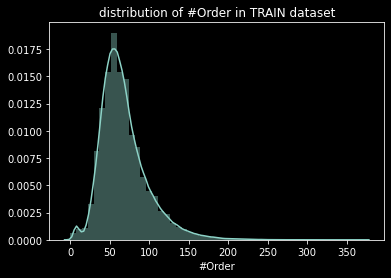

In [30]:
univar('#Order')

We can see that most of the stores received orders around 50-60 on a given day, but orders recieved over 200 are very rare.

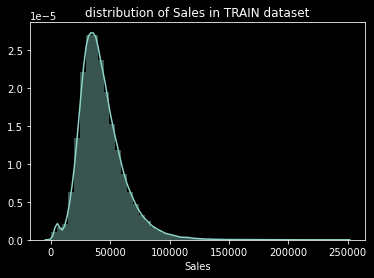

In [31]:
univar('Sales')

From the above we can see that most of the stores are making sales between 20000 to 50000 on a particular day but sales above 100000 are very rare.

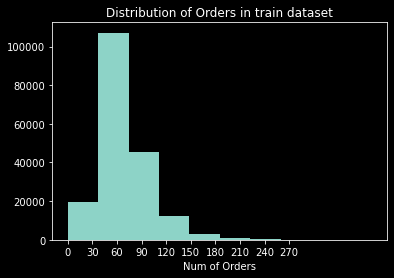

In [32]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
plt.hist(train['#Order'])
plt.title('Distribution of Orders in train dataset')
plt.xlabel('Num of Orders')
plt.xticks(ticks = np.arange(0,300,30))
plt.show()

We can see that most of the stores are receiving orders between 35 and 75 on a daily basis.

### Univariate Categorical analysis for TRAIN dataset

In [33]:
def unicat(var):
    plt.style.use('dark_background')
    plt.figure(figsize=(6,4))
    sns.countplot(x=var, data=train, hue='Discount')
    plt.title(f'Distribution of {var} in TRAIN dataset')
    plt.ylabel('Total number of sales')
    plt.show()

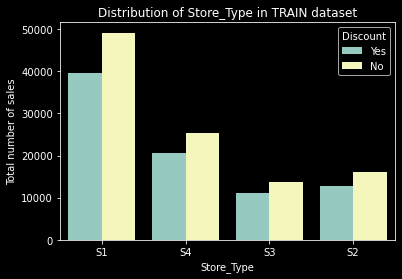

In [34]:
unicat('Store_Type')

Most the store making sales are of S1 type, whereas S3 type are making the least number of sales. Also the sales with dicount are less for each store types in comparison to sales with no discount, which may be because some people are not satisfied with the discounts on their orders and so they just skip them and move on to find some better alternative. Our client should focus on attracting these customers by providing them more discount on their orders.

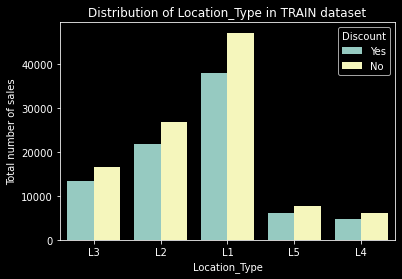

In [35]:
unicat('Location_Type')

Stores having L1 as their location type are making the most number of sales whereas L5 and L4 are the least ones, so the company can put more emphasis/effort on these two regions to increase their sales.

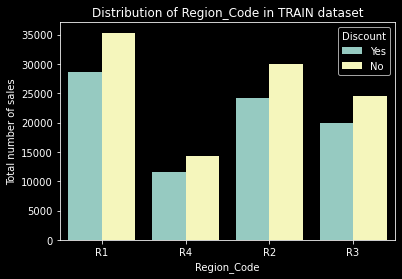

In [36]:
unicat('Region_Code')

Most of the sales are from R1 region whereas the least are from R4 region. The company can put more emphasis on R4 region to increase their sales.

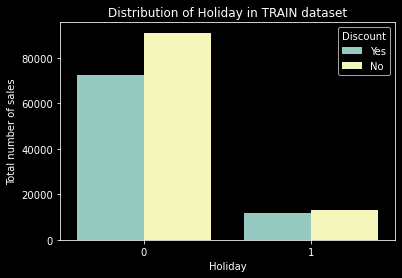

In [37]:
unicat('Holiday')

We can see something interesting here: Most of the sales were made on non-holidays instead of holidays(where people supposed have more free time to buy something from the stores). This maybe because most of the people try to take rest on holidays (because of their work) rather than shopping.

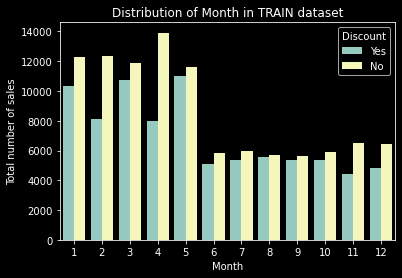

In [38]:
unicat('Month')

An interesting observation: The number of sales after month 5(May) decreased drastically upto december, which can be a huge loss for the company. Now this maybe because most of the stores are not selling enough items according to the change in months or seasons, like monsoon and winter since they occur after may(month 5), or maybe because customers are just unsatisfied with the products selling during this period(june-december). So our client could thus focus on supplying more monsoon and winter products in order to make more sales from the stores and increase customer base/cashflow.

### Bivariate analysis of numerical vs numerical features

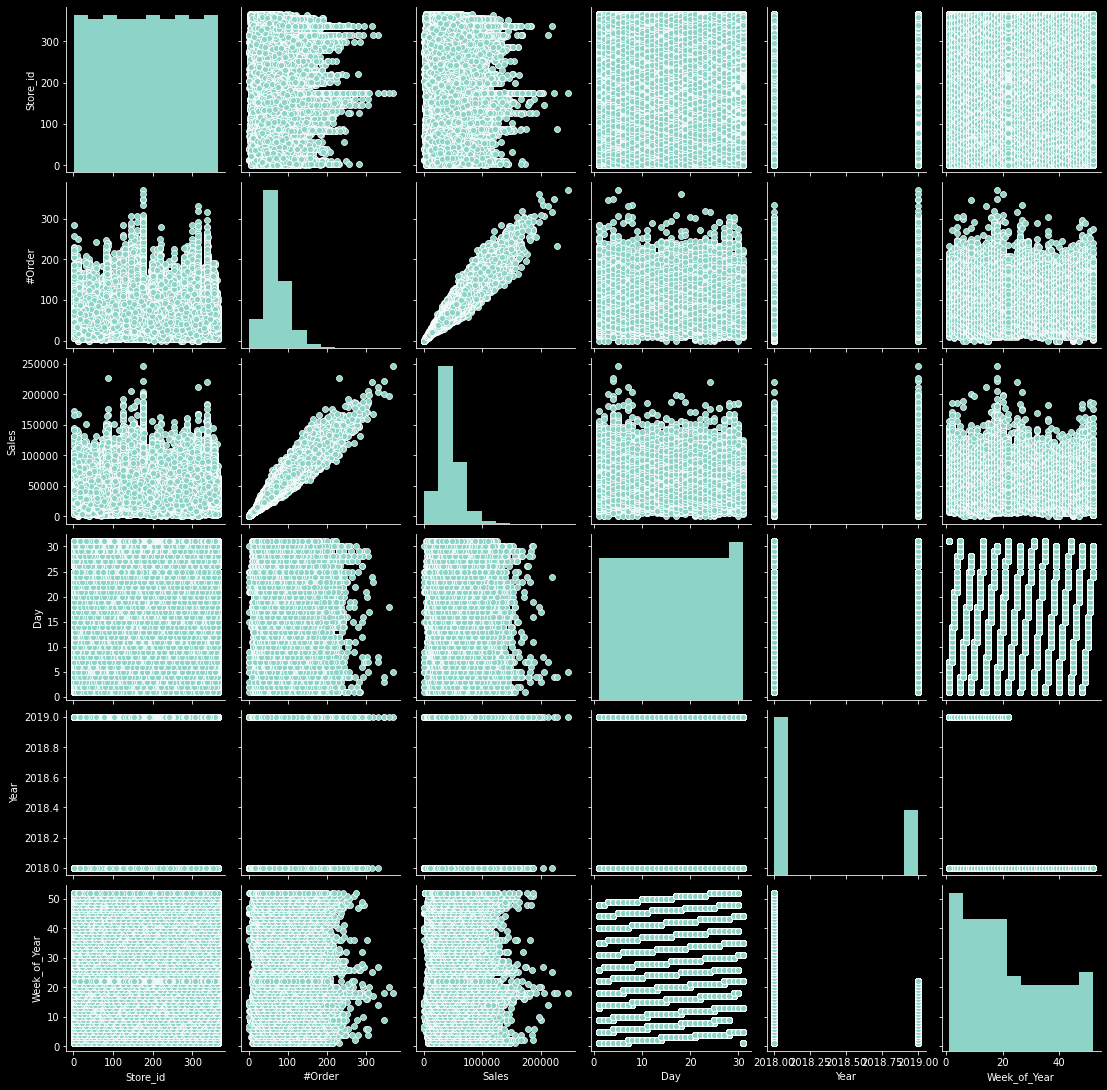

In [39]:
sns.pairplot(train[num_train])         

The only correlated columns are #Order and Sales as we can see from above.

### Bivariate analysis of Categorical vs Numerical features

In [40]:
def catnum(var1, var2):
    fig = plt.figure(figsize=(10,6))
    sns.boxenplot(x=train[var1], y=train[var2], hue=train['Discount'])
    plt.show()

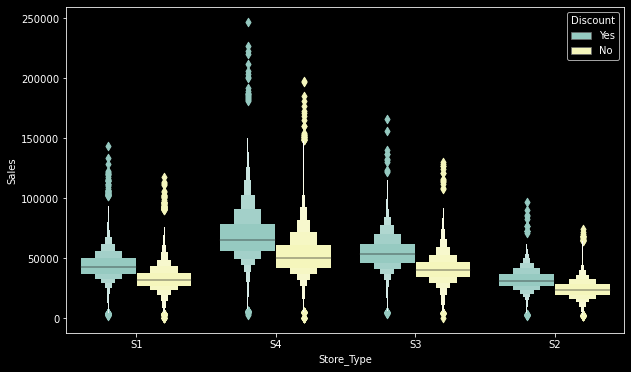

In [41]:
catnum('Store_Type','Sales')

S4 is making more sales than the other store types

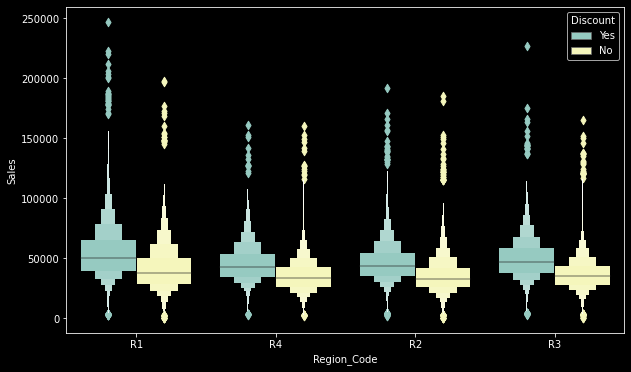

In [42]:
catnum('Region_Code', 'Sales')

Number of sales are higher in count and value in R1 region in comparison to other regions

### Finding correlations in the dataset

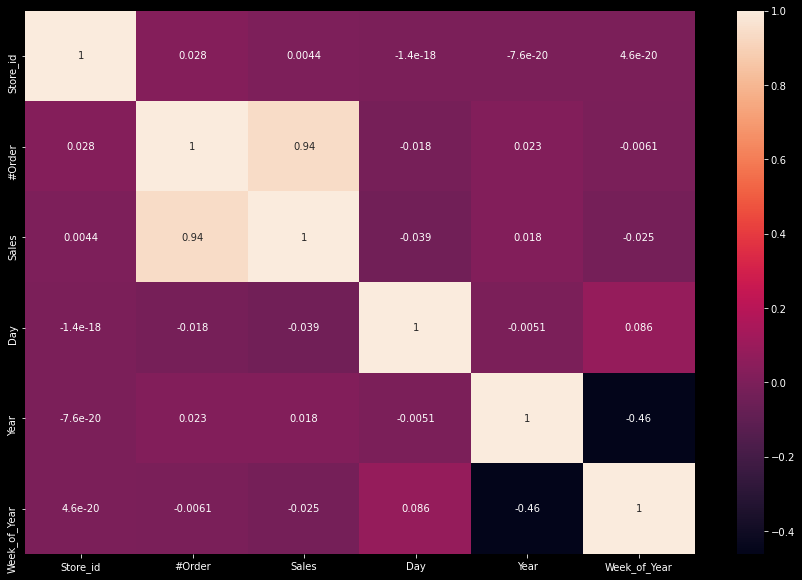

In [43]:
# Checking correlation between the features
fig = plt.figure(figsize=(15,10))
train_corr = train.corr()
sns.heatmap(train_corr, annot=True)

The most correlated columns are: (Sales, #Order) and among the other columns there are not that much correlation between them.

## Data Preprocessing

In [44]:
# Drooping ID & #Order columns as they are not present on our test dataset
train.drop(['ID', '#Order'], axis=1, inplace=True) 

# Copying the test data and Filtering out ID column from test dataset as it will be of no use in our modelling.
test2 = test.drop(['ID'], axis=1)  
                                       

In [45]:
train.shape, test2.shape

((188340, 12), (22265, 11))

In [46]:
train.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Day,Month,Year,Week_of_Year,day_of_week
Date,,,,,,,,,,,,
2018-01-01,1,S1,L3,R1,1,Yes,7011.84,1,1,2018,1,Monday
2018-01-01,253,S4,L2,R1,1,Yes,51789.12,1,1,2018,1,Monday
2018-01-01,252,S3,L2,R1,1,Yes,36868.20,1,1,2018,1,Monday
2018-01-01,251,S2,L3,R1,1,Yes,19715.16,1,1,2018,1,Monday
2018-01-01,250,S2,L3,R4,1,Yes,45614.52,1,1,2018,1,Monday


In [47]:
test2.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Day,Month,Year,Week_of_Year,day_of_week
Date,,,,,,,,,,,
2019-06-01,171,S4,L2,R3,0,No,1,6,2019,22,Saturday
2019-06-01,172,S1,L1,R1,0,No,1,6,2019,22,Saturday
2019-06-01,173,S4,L2,R1,0,No,1,6,2019,22,Saturday
2019-06-01,174,S1,L1,R4,0,No,1,6,2019,22,Saturday
2019-06-01,170,S1,L1,R2,0,No,1,6,2019,22,Saturday


In [48]:
train.columns

Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
       'Discount', 'Sales', 'Day', 'Month', 'Year', 'Week_of_Year',
       'day_of_week'],
      dtype='object')

In [49]:
test2.columns

Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
       'Discount', 'Day', 'Month', 'Year', 'Week_of_Year', 'day_of_week'],
      dtype='object')

In [50]:
# Changing dtype of 'month' column back for modelling purpose after analysis
train['Month'] = train['Month'].astype('int64')
test2['Month'] = test2['Month'].astype('int64')

# Changing dtype of holiday column back for modelling purpose
train['Holiday'] = train['Holiday'].astype('int64')
test2['Holiday'] = test2['Holiday'].astype('int64')

In [51]:
# Getting dummy variables for training and test dataset
dummy1 = pd.get_dummies(train['Store_Type'], drop_first=True)
dummy2 = pd.get_dummies(train['Location_Type'], drop_first=True)
dummy3 = pd.get_dummies(train['Region_Code'], drop_first=True)

dummy4 = pd.get_dummies(test2['Store_Type'], drop_first=True)
dummy5 = pd.get_dummies(test2['Location_Type'], drop_first=True)
dummy6 = pd.get_dummies(test2['Region_Code'], drop_first=True)

In [52]:
# Concatenating the columns
train = pd.concat([train, dummy1, dummy2, dummy3], axis=1)
test2 = pd.concat([test2, dummy4, dummy5, dummy6], axis=1)

In [53]:
train.shape, test2.shape

((188340, 22), (22265, 21))

In [54]:
# Deleting those columns of which we created dummies as we no longer need them
train.drop(['Store_Type', 'Location_Type', 'Region_Code'], axis=1, inplace=True)
test2.drop(['Store_Type', 'Location_Type', 'Region_Code'], axis=1, inplace=True)

In [55]:
train.shape, test2.shape

((188340, 19), (22265, 18))

In [56]:
# Mapping the Discount column to convert it into numrical value
train['Discount'] = train['Discount'].map({'Yes':1, 'No':0})
test2['Discount'] = test2['Discount'].map({'Yes':1, 'No':0})

In [57]:
# Mapping the day_of_week column using labelencoder
encoder = LabelEncoder()
train['day_of_week'] = encoder.fit_transform(train['day_of_week'])
test2['day_of_week'] = encoder.fit_transform(test2['day_of_week'])

In [58]:
train.head()

,Store_id,Holiday,Discount,Sales,Day,Month,Year,Week_of_Year,day_of_week,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4
Date,,,,,,,,,,,,,,,,,,,
2018-01-01,1,1,1,7011.84,1,1,2018,1,1,0,0,0,0,1,0,0,0,0,0
2018-01-01,253,1,1,51789.12,1,1,2018,1,1,0,0,1,1,0,0,0,0,0,0
2018-01-01,252,1,1,36868.20,1,1,2018,1,1,0,1,0,1,0,0,0,0,0,0
2018-01-01,251,1,1,19715.16,1,1,2018,1,1,1,0,0,0,1,0,0,0,0,0
2018-01-01,250,1,1,45614.52,1,1,2018,1,1,1,0,0,0,1,0,0,0,0,1


In [59]:
test2.head()

,Store_id,Holiday,Discount,Day,Month,Year,Week_of_Year,day_of_week,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4
Date,,,,,,,,,,,,,,,,,,
2019-06-01,171,0,0,1,6,2019,22,2,0,0,1,1,0,0,0,0,1,0
2019-06-01,172,0,0,1,6,2019,22,2,0,0,0,0,0,0,0,0,0,0
2019-06-01,173,0,0,1,6,2019,22,2,0,0,1,1,0,0,0,0,0,0
2019-06-01,174,0,0,1,6,2019,22,2,0,0,0,0,0,0,0,0,0,1
2019-06-01,170,0,0,1,6,2019,22,2,0,0,0,0,0,0,0,1,0,0


### Modelling

In [60]:
# Splliting training dataset into independent and target feature
Y = train['Sales']
X = train.drop(['Sales'], axis=1)

In [61]:
Y.shape, X.shape

((188340,), (188340, 18))

### Analyzing target variable

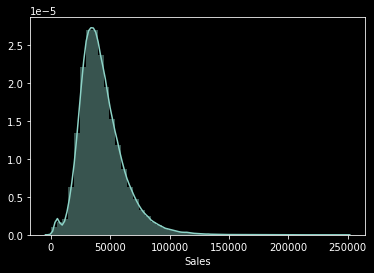

In [62]:
# Our target variable is slightly right skewed   
# I didn't apply any transformation on this variable because it was just decreasing the performance
sns.distplot(Y)    

In [63]:
# Train_test_split for out train dataset for model evaluation
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=42)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((150672, 18), (37668, 18), (150672,), (37668,))

In [64]:
x_train.head()

,Store_id,Holiday,Discount,Day,Month,Year,Week_of_Year,day_of_week,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4
Date,,,,,,,,,,,,,,,,,,
2018-05-19,237,0,0,19,5,2018,20,2,1,0,0,0,1,0,0,0,1,0
2019-05-06,129,0,0,6,5,2019,19,1,0,1,0,0,0,0,0,0,0,0
2019-04-22,57,0,0,22,4,2019,17,1,0,0,1,0,0,0,0,0,0,0
2018-02-10,276,1,1,10,2,2018,6,2,0,0,0,0,0,0,0,1,0,0
2018-03-26,130,0,0,26,3,2018,13,1,0,0,0,0,0,0,0,0,1,0


In [65]:
# Scaling the datasets

scaler = MinMaxScaler(feature_range=(0,3))
 
# Copy of datasets
x_train_stand = x_train.copy()
x_valid_stand = x_valid.copy()
y_train_stand = y_train.copy()
y_valid_stand = y_valid.copy()


cols = ['Store_id', 'Year','Day', 'Month', 'Year','Week_of_Year', 'day_of_week']

# Applying standardisation only on above features
for i in cols:
    scale = scaler.fit(x_train_stand[[i]])
    x_train_stand[i] = scale.transform(x_train_stand[[i]])
    x_valid_stand[i] = scale.transform(x_valid_stand[[i]]) 

# Transfroming target feature
# y_train_stand = scaler.fit_transform(y_train_stand.reshape(-1,1))
# y_valid_stand = scaler.transform(y_valid_stand.reshape(-1,1))

In [66]:
x_train_stand.head()

,Store_id,Holiday,Discount,Day,Month,Year,Week_of_Year,day_of_week,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4
Date,,,,,,,,,,,,,,,,,,
2018-05-19,1.945055,0,0,1.8,1.090909,0.0,1.117647,1.0,1,0,0,0,1,0,0,0,1,0
2019-05-06,1.054945,0,0,0.5,1.090909,3.0,1.058824,0.5,0,1,0,0,0,0,0,0,0,0
2019-04-22,0.461538,0,0,2.1,0.818182,3.0,0.941176,0.5,0,0,1,0,0,0,0,0,0,0
2018-02-10,2.266484,1,1,0.9,0.272727,0.0,0.294118,1.0,0,0,0,0,0,0,0,1,0,0
2018-03-26,1.063187,0,0,2.5,0.545455,0.0,0.705882,0.5,0,0,0,0,0,0,0,0,1,0


In [67]:
x_valid_stand.head()

,Store_id,Holiday,Discount,Day,Month,Year,Week_of_Year,day_of_week,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4
Date,,,,,,,,,,,,,,,,,,
2018-01-07,2.357143,0,0,0.6,0.000000,0.0,0.000000,1.5,0,0,0,0,0,1,0,0,0,0
2018-03-18,2.142857,1,1,1.7,0.545455,0.0,0.588235,1.5,0,0,1,1,0,0,0,0,0,0
2018-03-28,0.914835,0,1,2.7,0.545455,0.0,0.705882,3.0,0,0,0,0,0,0,0,0,1,0
2018-09-14,0.041209,0,0,1.3,2.181818,0.0,2.117647,0.0,0,0,1,0,0,0,0,0,0,0
2018-08-09,2.802198,0,0,0.8,1.909091,0.0,1.823529,2.0,0,0,0,0,0,0,0,1,0,0


In [68]:
# Building our models
model1 = LinearRegression()
model2 = SVR()
model3 = DecisionTreeRegressor()
model4 = RandomForestRegressor()
model5 = ElasticNet()
model6 = Lasso()
model7 = BayesianRidge() 
model8 = LassoLarsIC()
model9 = XGBRegressor()
model10 = GradientBoostingRegressor()
model11 = ExtraTreesRegressor()
model12 = LGBMRegressor()

In [69]:
# Using cross-validation scores to compare the models, rejecting model2 as it was taking too much time to execute
for i in [model1, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12]:
    print('The avg cross_val_score for the {} is = {}'.format(i, cross_val_score(i, x_train_stand, y_train, cv=5, n_jobs=-1).
                                                              mean()))


The avg cross_val_score for the LinearRegression() is = 0.5519298552940404
The avg cross_val_score for the DecisionTreeRegressor() is = 0.6130182850923653
The avg cross_val_score for the RandomForestRegressor() is = 0.7799231143170056
The avg cross_val_score for the ElasticNet() is = 0.3303248283210779
The avg cross_val_score for the Lasso() is = 0.551929915004085
The avg cross_val_score for the BayesianRidge() is = 0.551929876683255
The avg cross_val_score for the LassoLarsIC() is = 0.5519326971472911
The avg cross_val_score for the XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=N

### Feature Selection (A try)

In [70]:
# Since model9(XGBRegressor()) is giving the highest cross_val_score that's why we will now work with this model

# Creating a pipeline for feature selection and then training
pipe = make_pipeline(SelectFromModel(estimator=model9), model9)

In [71]:
# Its actually performing worse with feature selecction
cross_val_score(pipe, x_train_stand, y_train, cv=5, n_jobs=-1).mean()     

0.42385457495784723

In [72]:
# Training the baseline model
model9.fit(x_train_stand, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
# Making the predicition on validation dataset to check
pred = model9.predict(x_valid_stand)

In [74]:
mean_squared_error(y_valid, pred)    # Cheking MSE (mean squared error)

59407830.95785571

In [75]:
# Checking root mean squared error (we will check this again after tuing the model)
RMSE = np.sqrt(mean_squared_error(y_valid, pred))  

In [76]:
RMSE

7707.647563158016

In [77]:
# Checking test dataset for making predictions
test2.head()

,Store_id,Holiday,Discount,Day,Month,Year,Week_of_Year,day_of_week,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4
Date,,,,,,,,,,,,,,,,,,
2019-06-01,171,0,0,1,6,2019,22,2,0,0,1,1,0,0,0,0,1,0
2019-06-01,172,0,0,1,6,2019,22,2,0,0,0,0,0,0,0,0,0,0
2019-06-01,173,0,0,1,6,2019,22,2,0,0,1,1,0,0,0,0,0,0
2019-06-01,174,0,0,1,6,2019,22,2,0,0,0,0,0,0,0,0,0,1
2019-06-01,170,0,0,1,6,2019,22,2,0,0,0,0,0,0,0,1,0,0


In [78]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22265 entries, 2019-06-01 to 2019-07-31
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Store_id      22265 non-null  int64
 1   Holiday       22265 non-null  int64
 2   Discount      22265 non-null  int64
 3   Day           22265 non-null  int64
 4   Month         22265 non-null  int64
 5   Year          22265 non-null  int64
 6   Week_of_Year  22265 non-null  int64
 7   day_of_week   22265 non-null  int32
 8   S2            22265 non-null  uint8
 9   S3            22265 non-null  uint8
 10  S4            22265 non-null  uint8
 11  L2            22265 non-null  uint8
 12  L3            22265 non-null  uint8
 13  L4            22265 non-null  uint8
 14  L5            22265 non-null  uint8
 15  R2            22265 non-null  uint8
 16  R3            22265 non-null  uint8
 17  R4            22265 non-null  uint8
dtypes: int32(1), int64(7), uint8(10)
memory usage: 1.

In [79]:
Num_feat = ['Store_id', 'Year','Day', 'Month', 'Year','Week_of_Year', 'day_of_week']

# Scaling the numeric features
for i in Num_feat:
    test2[i] = scaler.transform(test2[[i]])

In [80]:
test2.head()

,Store_id,Holiday,Discount,Day,Month,Year,Week_of_Year,day_of_week,S2,S3,S4,L2,L3,L4,L5,R2,R3,R4
Date,,,,,,,,,,,,,,,,,,
2019-06-01,85.5,0,0,0.5,3.0,504.75,11.0,1.0,0,0,1,1,0,0,0,0,1,0
2019-06-01,86.0,0,0,0.5,3.0,504.75,11.0,1.0,0,0,0,0,0,0,0,0,0,0
2019-06-01,86.5,0,0,0.5,3.0,504.75,11.0,1.0,0,0,1,1,0,0,0,0,0,0
2019-06-01,87.0,0,0,0.5,3.0,504.75,11.0,1.0,0,0,0,0,0,0,0,0,0,1
2019-06-01,85.0,0,0,0.5,3.0,504.75,11.0,1.0,0,0,0,0,0,0,0,1,0,0


In [81]:
# Making predictions from our selected model(baseline)
# test_pred = model9.predict(test2)

In [82]:
 # test_pred                   

array([85800.42 , 41990.086, 93156.42 , ..., 56700.477, 33086.13 ,
       30807.852], dtype=float32)

In [83]:
# Checking negative values if any
# test_pred[test_pred<0]

array([-419.88922], dtype=float32)

###  Final Prediction with HyperParameter Tuning

In [84]:
params_grid = {'n_estimators':[100,200,500],
              'max_depth':[2,7,10],
              'eta':[0.01,0.1,0.3],'subsample':[0.7], 'colsample_bytree':[0.8]}

xg_random = RandomizedSearchCV(model9, params_grid, cv=5, verbose=2, random_state=17, n_jobs=-1)

In [85]:
# Fitting the random search model
xg_random.fit(x_train_stand, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 18.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_

In [86]:
xg_random.best_estimator_, xg_random.best_params_, xg_random.best_score_

(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.01, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None),
 {'subsample': 0.7,
  'n_estimators': 500,
  'max_depth': 7,
  'eta': 0.01,
  'colsample_bytree': 0.8},
 0.8304986604661073)

In [87]:
# Making predictions on validation dataset
rand_pred = xg_random.predict(x_valid_stand)

In [88]:
mean_squared_error(y_valid, rand_pred)  # Checking MSE(mean_squared_error)

55704633.53669442

In [89]:
# RMSE(root_mean_square_error) got reduced, hence tuning worked better against our baseline model
np.sqrt(mean_squared_error(y_valid, rand_pred))   

7463.553680164324

In [90]:
# Finally making predictions on test2 (copy of test) dataset
test_pred2 = xg_random.predict(test2)

In [91]:
test_pred2

array([75824.445, 45364.42 , 91082.6  , ..., 61943.605, 28113.586,
       24918.848], dtype=float32)

In [92]:
test_pred2[test_pred2<0]       # No negative prediction by our model

array([], dtype=float32)

In [95]:
# Creating dataframe to organize the results
df2 = pd.DataFrame({'ID':test['ID'], 'Sales':test_pred2})   # Taking ID from our original test dataset

In [96]:
df2      # Our final prediction

,ID,Sales
Date,,
2019-06-01,T1188341,75824.445312
2019-06-01,T1188342,45364.421875
2019-06-01,T1188343,91082.601562
2019-06-01,T1188344,37387.304688
2019-06-01,T1188345,43738.265625
...,...,...
2019-07-31,T1210601,25543.501953
2019-07-31,T1210602,77881.187500
2019-07-31,T1210603,61943.605469


In [97]:
# Saving our prediction inside a csv file
df2.to_csv('Manoj-Kumar-Final-Submission.csv', index=False)